ANN/CNN models are heavily over-parameterized and can often get to perfect results on training data. However, they do not produce the similar result on unseen data, suggesting the model is overfitted.
There are multiple ways to avoid overfitting:

    Data Augmentation
    L1/L2 Regularization
    Dropout
    Early Stopping


### https://github.com/zhong110020/imgaug

### 1. Data Augmentation

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
#!pip install imgaug

Original:


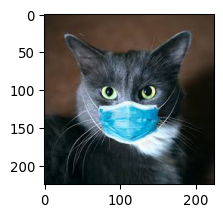

In [10]:
import imageio
import imgaug as ia
%matplotlib inline

image = imageio.imread("Cat.jpg")

print("Original:")
ia.imshow(image)

Augmented 1: Rotate


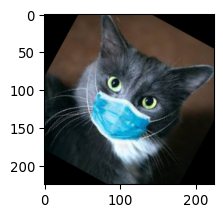

Augmented 2: Add Noise


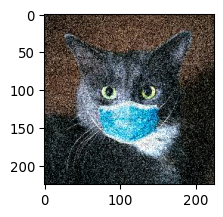

Augmented 3: Cropped


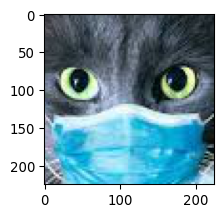

Augmented 3: Sharpened


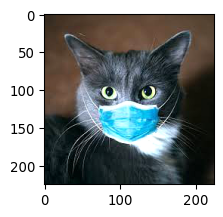

In [14]:
from imgaug import augmenters as iaa
ia.seed(4)

rotate = iaa.Affine(rotate=(-300, 300))
image_aug = rotate(image=image)

print("Augmented 1: Rotate")
ia.imshow(image_aug)

noise = iaa.AdditiveGaussianNoise(scale=(40, 90))
image_aug = noise(image=image)

print("Augmented 2: Add Noise")
ia.imshow(image_aug)

crop = iaa.Crop(percent=(0.3, 0.3))
image_aug = crop(image=image)

print("Augmented 3: Cropped")
ia.imshow(image_aug)


sharp = iaa.Sharpen(alpha=(0, 1.0), lightness=(5, 2.5)) # Sharpen images
image_aug = sharp(image=image)

print("Augmented 3: Sharpened")
ia.imshow(image_aug)

#### Some  more augmentation

Augmented 1: Grey


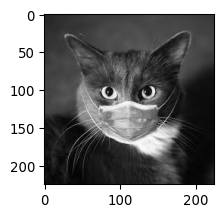

Augmented 1: Invert 1


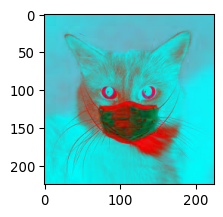

Augmented 1: Invert 2


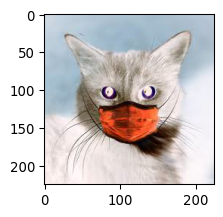

In [119]:
from imgaug import augmenters as iaa


grey = iaa.Grayscale(alpha=(1.0, 1.0))
image_aug = grey(image=image)

print("Augmented 1: Grey")
ia.imshow(image_aug)

# Invert 1

inv1 = iaa.Invert(0.5, per_channel=True)  # invert color channels
image_aug = inv1(image=image)

print("Augmented 1: Invert 1")
ia.imshow(image_aug)

# Invert 2

inv2 = iaa.Invert(1, per_channel=True)  # invert color channels
image_aug = inv2(image=image)

print("Augmented 1: Invert 2")
ia.imshow(image_aug)




Augmented 1: Invert 2


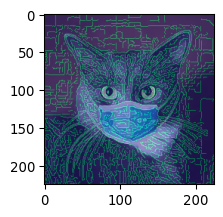

In [120]:
# canny edge detector to input images
import imgaug.augmenters as iaa
aug = iaa.Canny(alpha=(0.5, 0.5))
image_aug = aug(image=image)

print("Augmented 1: Invert 2")
ia.imshow(image_aug)

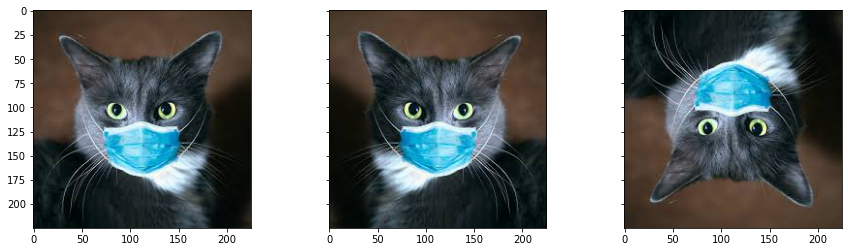

In [121]:
import numpy as np
from skimage import transform as tf

# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)

# flip left-right, up-down
image_flipr = np.fliplr(image)
image_flipud = np.flipud(image)

plot_image([image, image_flipr, image_flipud])

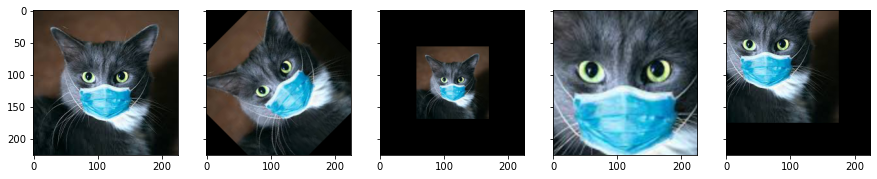

In [73]:
# specify x and y coordinates to be used for shifting (mid points)
shift_x, shift_y = image.shape[0]/2, image.shape[1]/2

# translation by certain units
matrix_to_topleft = tf.SimilarityTransform(translation=[-shift_x, -shift_y])
matrix_to_center = tf.SimilarityTransform(translation=[shift_x, shift_y])

# rotation
rot_transforms =  tf.AffineTransform(rotation=np.deg2rad(45))
rot_matrix = matrix_to_topleft + rot_transforms + matrix_to_center
rot_image = tf.warp(image, rot_matrix)

# scaling 
scale_transforms = tf.AffineTransform(scale=(2, 2))
scale_matrix = matrix_to_topleft + scale_transforms + matrix_to_center
scale_image_zoom_out = tf.warp(image, scale_matrix)

scale_transforms = tf.AffineTransform(scale=(0.5, 0.5))
scale_matrix = matrix_to_topleft + scale_transforms + matrix_to_center
scale_image_zoom_in = tf.warp(image, scale_matrix)

# translation
transaltion_transforms = tf.AffineTransform(translation=(50, 50))
translated_image = tf.warp(image, transaltion_transforms)


plot_image([image, rot_image, scale_image_zoom_out, scale_image_zoom_in, translated_image])

In [123]:
# Picture representation in pixel
print(image.shape)
print(image[0][0])    # RGB of first pixel
print(image[0][0][0])    # R of first pixel
image

(225, 225, 3)
[51 41 31]
51


Array([[[51, 41, 31],
        [51, 41, 31],
        [51, 41, 31],
        ...,
        [69, 53, 38],
        [69, 53, 38],
        [68, 52, 39]],

       [[50, 40, 30],
        [50, 40, 30],
        [50, 40, 30],
        ...,
        [69, 53, 38],
        [69, 53, 38],
        [68, 52, 39]],

       [[50, 40, 30],
        [50, 40, 30],
        [50, 40, 30],
        ...,
        [69, 53, 38],
        [69, 53, 38],
        [68, 52, 39]],

       ...,

       [[ 7, 18, 20],
        [ 6, 17, 19],
        [ 5, 16, 18],
        ...,
        [35, 32, 25],
        [36, 33, 26],
        [36, 31, 25]],

       [[ 7, 18, 20],
        [ 6, 17, 19],
        [ 4, 15, 17],
        ...,
        [36, 33, 26],
        [37, 34, 27],
        [36, 31, 25]],

       [[ 5, 16, 18],
        [ 3, 14, 16],
        [ 1, 12, 14],
        ...,
        [33, 30, 23],
        [34, 31, 24],
        [38, 33, 27]]], dtype=uint8)

Augmented 1: Convert L


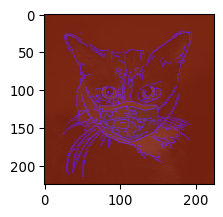

Augmented 1: Convert 1


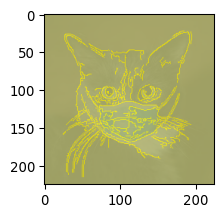

Augmented 1: Convert PA


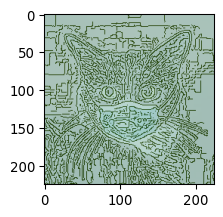

In [79]:
from PIL import Image
img = Image.open("Cat.jpg").convert("LA")
image_aug = aug(image=image)

print("Augmented 1: Convert L")
ia.imshow(image_aug)


img = Image.open("Cat.jpg").convert("1")
image_aug = aug(image=image)

print("Augmented 1: Convert 1")
ia.imshow(image_aug)

img = Image.open("Cat.jpg").convert("PA")
image_aug = aug(image=image)

print("Augmented 1: Convert PA")
ia.imshow(image_aug)


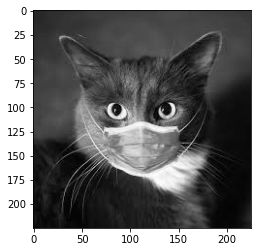

In [81]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("Cat.jpg")

R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')
plt.show()

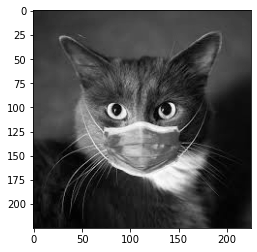

In [124]:
img = mpimg.imread("Cat.jpg")

R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgGray = .5 * R + .5 * G + .1 * B
plt.imshow(imgGray, cmap='gray')
plt.show()

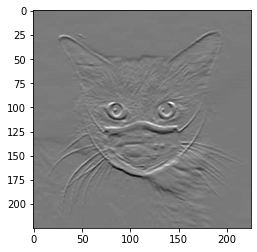

In [87]:
# 3x3 array for edge detection
import cv2
mat_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
mat_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
  
filtered_image = cv2.filter2D(imgGray, -1, mat_y)
plt.imshow(filtered_image, cmap='gray')


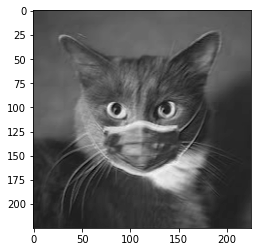

In [88]:
filtered_image2 = cv2.filter2D(imgGray, -1, mat_x)
plt.imshow(filtered_image2, cmap='gray')

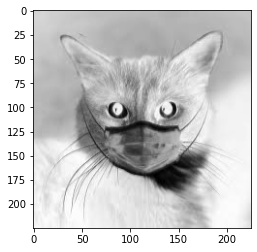

In [125]:
mat_y = np.array([[ -1, 0, 0], 
                  [ -2, 0, 0], 
                  [ -5, 0, 0]])

  
filtered_image = cv2.filter2D(imgGray, -1, mat_y)
plt.imshow(filtered_image, cmap='gray')

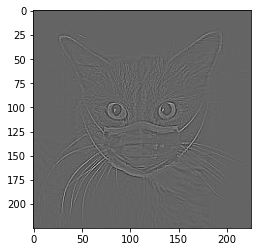

In [104]:
mat_y = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
  
filtered_image = cv2.filter2D(imgGray, -1, mat_y)
plt.imshow(filtered_image, cmap='gray')

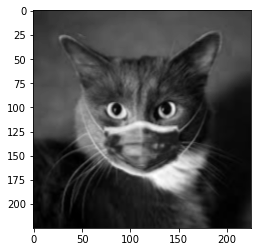

In [111]:
# Gaussian blur operation

mat_y = np.array([[1, 2, 1], [2, 4, 2], [3, 6, 3]])
filtered_image = cv2.filter2D(imgGray, -1, mat_y)
plt.imshow(filtered_image, cmap='gray')